Calculated Angles: Shoulder = -56.20°, Elbow = 75.52°


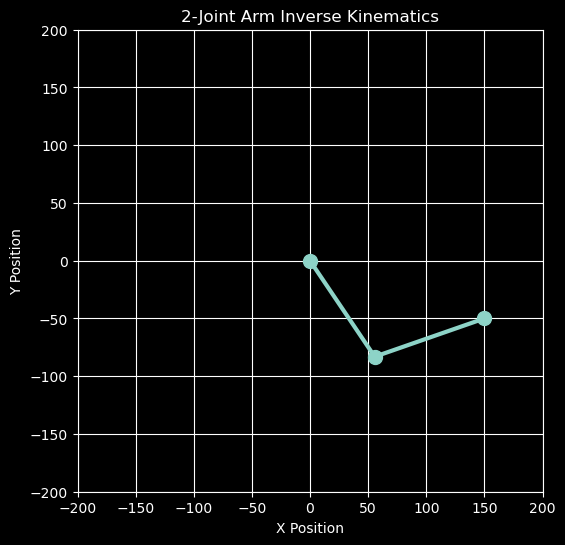

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Length of the two arm segments
L1 = 100  # Length of first segment
L2 = 100  # Length of second segment

def inverse_kinematics(x_target, y_target):
    """
    Calculate the angles for the joints to reach the target position.
    """
    # Calculate the distance from the origin to the target
    distance = np.sqrt(x_target**2 + y_target**2)

    # Check if the target is reachable
    if distance > (L1 + L2):
        raise ValueError("Target is out of reach")

    # Inverse kinematics calculations for a 2D two-link arm
    cos_angle2 = (x_target**2 + y_target**2 - L1**2 - L2**2) / (2 * L1 * L2)
    angle2 = np.arccos(np.clip(cos_angle2, -1, 1))  # Joint angle 2 (elbow)

    k1 = L1 + L2 * np.cos(angle2)
    k2 = L2 * np.sin(angle2)
    angle1 = np.arctan2(y_target, x_target) - np.arctan2(k2, k1)  # Joint angle 1 (shoulder)

    return angle1, angle2

def plot_arm(angle1, angle2):
    """
    Plot the arm based on calculated angles.
    """
    # Calculate joint positions
    x1 = L1 * np.cos(angle1)
    y1 = L1 * np.sin(angle1)
    x2 = x1 + L2 * np.cos(angle1 + angle2)
    y2 = y1 + L2 * np.sin(angle1 + angle2)

    # Plot arm segments
    plt.figure(figsize=(6, 6))
    plt.plot([0, x1, x2], [0, y1, y2], '-o', markersize=10, lw=3)
    plt.xlim(-200, 200)
    plt.ylim(-200, 200)
    plt.grid()
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("2-Joint Arm Inverse Kinematics")
    plt.show()

# Define the target position
x_target = 150  # Target x-coordinate
y_target = -50   # Target y-coordinate

# Compute the joint angles for the target
try:
    angle1, angle2 = inverse_kinematics(x_target, y_target)
    print(f"Calculated Angles: Shoulder = {np.degrees(angle1):.2f}°, Elbow = {np.degrees(angle2):.2f}°")

    # Plot the arm with the computed angles
    plot_arm(angle1, angle2)
except ValueError as e:
    print(e)


Calculated Angles: 0.00, 0.00, 0.00, 0.00, 0.00, 0.00


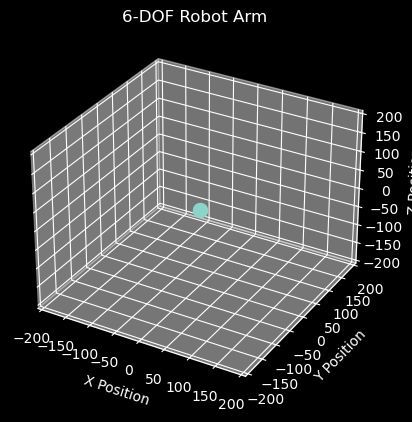

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Panjang tiap segmen lengan dalam satuan yang sama (misalnya, mm)
L1, L2, L3 = 100, 100, 50  # Sesuaikan dengan panjang segmen Anda

def forward_kinematics(theta1, theta2, theta3, theta4, theta5, theta6):
    """
    Hitung posisi akhir dalam ruang 3D berdasarkan sudut pada tiap sendi.
    """
    # Matriks Transformasi Homogen untuk tiap sendi menggunakan Denavit-Hartenberg parameters.
    # Misalnya, DH parameters bisa didapatkan berdasarkan panjang dan sudut tiap segmen
    # (theta, d, a, alpha) adalah parameter DH.
    
    # Misalkan menggunakan placeholder identity matrix sementara:
    T = np.identity(4)
    
    # Urutan transformasi untuk tiap segmen:
    # Implementasikan transformasi DH di sini
    
    # Posisi akhir (End-Effector)
    x_end, y_end, z_end = T[0, 3], T[1, 3], T[2, 3]
    return x_end, y_end, z_end

def inverse_kinematics_6dof(x_target, y_target, z_target):
    """
    Perhitungan sudut inverse kinematics untuk mencapai target dalam 3D.
    """
    # Placeholder untuk algoritma inverse kinematics 6 DOF:
    theta1, theta2, theta3, theta4, theta5, theta6 = 0, 0, 0, 0, 0, 0
    
    # Perhitungan inverse kinematics dilakukan di sini
    
    return theta1, theta2, theta3, theta4, theta5, theta6

def plot_arm(theta1, theta2, theta3, theta4, theta5, theta6):
    """
    Visualisasi lengan robot dalam 3D berdasarkan sudut sendi.
    """
    # Hitung posisi tiap segmen berdasarkan forward kinematics
    x, y, z = forward_kinematics(theta1, theta2, theta3, theta4, theta5, theta6)

    # Plot dalam 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([0, x], [0, y], [0, z], '-o', markersize=10, lw=3)
    ax.set_xlim([-200, 200])
    ax.set_ylim([-200, 200])
    ax.set_zlim([-200, 200])
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    plt.title("6-DOF Robot Arm")
    plt.show()

# Target posisi dalam 3D
x_target, y_target, z_target = 90, 0, 20  # Sesuaikan target Anda

try:
    # Hitung sudut yang dibutuhkan untuk mencapai posisi target
    theta1, theta2, theta3, theta4, theta5, theta6 = inverse_kinematics_6dof(x_target, y_target, z_target)
    print(f"Calculated Angles: {theta1:.2f}, {theta2:.2f}, {theta3:.2f}, {theta4:.2f}, {theta5:.2f}, {theta6:.2f}")

    # Visualisasikan lengan robot
    plot_arm(theta1, theta2, theta3, theta4, theta5, theta6)
except ValueError as e:
    print(e)


Calculated Angles: Theta1 = 180.00°, Theta2 = 180.00°, Theta3 = 90.00°, Theta4 = 180.00°, Theta5 = 180.00°, Theta6 = 180.00°


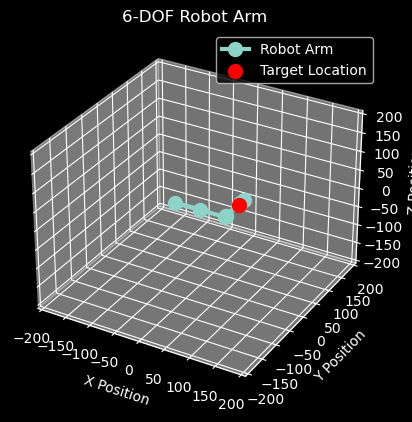

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

L1 = 50  # Panjang segmen pertama
L2 = 100   # Panjang segmen kedua
L3 = 70   # Panjang segmen ketiga
L4 = 65   # Panjang segmen keempat
L5 = 50   # Panjang segmen kelima
L6 = 50   # Panjang segmen keenam

def forward_kinematics(angles):
    """
    Hitung posisi tiap joint berdasarkan panjang segmen yang berbeda.
    `angles` adalah list yang berisi enam sudut [θ1, θ2, θ3, θ4, θ5, θ6].
    """
    θ1, θ2, θ3, θ4, θ5, θ6 = angles
    
    # Inisialisasi posisi awal
    x, y, z = 0, 0, 0
    
    # Posisi setiap joint
    positions = [(x, y, z)]

    # Joint 1
    x += L1 * np.cos(θ1)
    y += L1 * np.sin(θ1)
    z += 0  # Asumsi pergerakan hanya pada x-y plane di awal
    positions.append((x, y, z))

    # Joint 2
    x += L2 * np.cos(θ1 + θ2)
    y += L2 * np.sin(θ1 + θ2)
    positions.append((x, y, z))

    # Joint 3
    x += L3 * np.cos(θ1 + θ2 + θ3)
    y += L3 * np.sin(θ1 + θ2 + θ3)
    positions.append((x, y, z))

    # Joint 4
    x += L4 * np.cos(θ1 + θ2 + θ3 + θ4)
    y += L4 * np.sin(θ1 + θ2 + θ3 + θ4)
    positions.append((x, y, z))

    # Joint 5
    x += L5 * np.cos(θ1 + θ2 + θ3 + θ4 + θ5)
    y += L5 * np.sin(θ1 + θ2 + θ3 + θ4 + θ5)
    positions.append((x, y, z))

    # Joint 6 (End-Effector)
    x += L6 * np.cos(θ1 + θ2 + θ3 + θ4 + θ5 + θ6)
    y += L6 * np.sin(θ1 + θ2 + θ3 + θ4 + θ5 + θ6)
    positions.append((x, y, z))

    return positions

def objective_function(angles, x_target, y_target, z_target):
    """
    Fungsi objektif untuk optimasi inverse kinematics.
    """
    end_effector_position = forward_kinematics(angles)[-1]  # Hanya posisi end-effector
    x, y, z = end_effector_position
    distance = np.sqrt((x - x_target)**2 + (y - y_target)**2 + (z - z_target)**2)
    return distance

def inverse_kinematics_6dof(x_target, y_target, z_target):
    """
    Menghitung inverse kinematics untuk mencapai target di (x, y, z) dalam 3D.
    """
    initial_guess = [0, 0, 0, 0, 0, 0]  # Awal tebakan sudut
    result = minimize(objective_function, initial_guess, args=(x_target, y_target, z_target), bounds=[(-np.pi, np.pi)]*6)

    if result.success:
        return result.x  # Sudut yang dioptimalkan
    else:
        raise ValueError("Tidak ditemukan solusi")

def plot_arm(angles, x_target, y_target, z_target):
    """
    Visualisasi lengan robot dalam 3D berdasarkan sudut sendi dan lokasi objek target.
    """
    positions = forward_kinematics(angles)
    x_coords, y_coords, z_coords = zip(*positions)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_coords, y_coords, z_coords, '-o', markersize=10, lw=3, label="Robot Arm")
    
    # Visualisasi titik merah untuk lokasi target
    ax.scatter(x_target, y_target, z_target, color='red', s=100, label="Target Location")

    ax.set_xlim([-200, 200])
    ax.set_ylim([-200, 200])
    ax.set_zlim([-200, 200])
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    plt.title("6-DOF Robot Arm")
    plt.legend()
    plt.show()

# Target posisi dalam 3D
x_target, y_target, z_target = 50, 50, 0

try:
    theta1, theta2, theta3, theta4, theta5, theta6 = inverse_kinematics_6dof(x_target, y_target, z_target)
    print(f"Calculated Angles: Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°, Theta3 = {np.degrees(theta3):.2f}°, Theta4 = {np.degrees(theta4):.2f}°, Theta5 = {np.degrees(theta5):.2f}°, Theta6 = {np.degrees(theta6):.2f}°")

    plot_arm([theta1, theta2, theta3, theta4, theta5, theta6], x_target, y_target, z_target)
except ValueError as e:
    print(e)


### 6 Dof

Calculated Angles: Theta1 = -8.63°, Theta2 = 0.08°, Theta3 = 17.87°, Theta4 = 21.92°, Theta5 = 19.06°, Theta6 = 17.55°


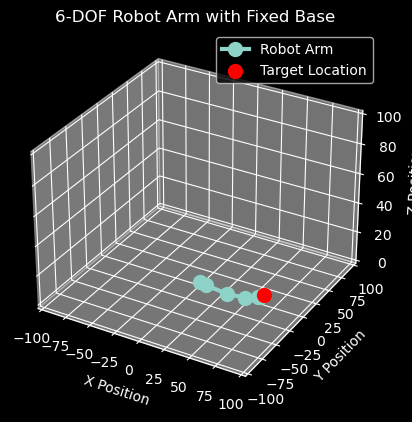

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

L1 = 7   # base
L2 = 24  # lower arm
L3 = 17   # center arm
L4 = 11   # upper arm
L5 = 2   # neck gripper
L6 = 5   # gripper

def forward_kinematics(angles):
    """
    Hitung posisi tiap joint berdasarkan panjang segmen yang berbeda.
    `angles` adalah list yang berisi enam sudut [θ1, θ2, θ3, θ4, θ5, θ6].
    """
    θ1, θ2, θ3, θ4, θ5, θ6 = angles
    
    # Mulai dari posisi dasar di tengah (0, 0, 0)
    x, y, z = 0, 0, 0
    positions = [(x, y, z)]

    # Joint 1 (tetap sebagai dasar tetap di posisi ini)
    x += L1 * np.cos(θ1)
    y += L1 * np.sin(θ1)
    z += 0  # Tetap pada sumbu z yang sama untuk dasar
    positions.append((x, y, z))

    # Joint 2
    x += L2 * np.cos(θ1 + θ2)
    y += L2 * np.sin(θ1 + θ2)
    positions.append((x, y, z))

    # Joint 3
    x += L3 * np.cos(θ1 + θ2 + θ3)
    y += L3 * np.sin(θ1 + θ2 + θ3)
    positions.append((x, y, z))

    # Joint 4
    x += L4 * np.cos(θ1 + θ2 + θ3 + θ4)
    y += L4 * np.sin(θ1 + θ2 + θ3 + θ4)
    positions.append((x, y, z))

    # Joint 5
    x += L5 * np.cos(θ1 + θ2 + θ3 + θ4 + θ5)
    y += L5 * np.sin(θ1 + θ2 + θ3 + θ4 + θ5)
    positions.append((x, y, z))

    # Joint 6 (End-Effector)
    x += L6 * np.cos(θ1 + θ2 + θ3 + θ4 + θ5 + θ6)
    y += L6 * np.sin(θ1 + θ2 + θ3 + θ4 + θ5 + θ6)
    positions.append((x, y, z))

    return positions

def objective_function(angles, x_target, y_target, z_target):
    """
    Fungsi objektif untuk optimasi inverse kinematics.
    """
    end_effector_position = forward_kinematics(angles)[-1]  # Hanya posisi end-effector
    x, y, z = end_effector_position
    distance = np.sqrt((x - x_target)**2 + (y - y_target)**2 + (z - z_target)**2)
    return distance

def inverse_kinematics_6dof(x_target, y_target, z_target):
    """
    Menghitung inverse kinematics untuk mencapai target di (x, y, z) dalam 3D.
    """
    initial_guess = [0, 0, 0, 0, 0, 0]  # nilai awal
    result = minimize(objective_function, initial_guess, args=(x_target, y_target, z_target), bounds=[(-np.pi, np.pi)]*6)

    if result.success:
        return result.x 
    else:
        raise ValueError("Tidak ditemukan solusi")

def plot_arm(angles, x_target, y_target, z_target):
    """
    Visualisasi lengan robot dalam 3D berdasarkan sudut sendi dan lokasi objek target.
    """
    positions = forward_kinematics(angles)
    x_coords, y_coords, z_coords = zip(*positions)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_coords, y_coords, z_coords, '-o', markersize=10, lw=3, label="Robot Arm")
    
    # Visualisasi lokasi target
    ax.scatter(x_target, y_target, z_target, color='red', s=100, label="Target Location")

    ax.set_xlim([-100, 100])
    ax.set_ylim([-100, 100])
    ax.set_zlim([0, 100])  # Perubahan batas z agar dasar terlihat lebih jelas
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    plt.title("6-DOF Robot Arm with Fixed Base")
    plt.legend()
    plt.show()

# Target posisi dalam 3D
x_target, y_target, z_target = 60, 10, 0

try:
    theta1, theta2, theta3, theta4, theta5, theta6 = inverse_kinematics_6dof(x_target, y_target, z_target)
    print(f"Calculated Angles: Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°, Theta3 = {np.degrees(theta3):.2f}°, Theta4 = {np.degrees(theta4):.2f}°, Theta5 = {np.degrees(theta5):.2f}°, Theta6 = {np.degrees(theta6):.2f}°")

    plot_arm([theta1, theta2, theta3, theta4, theta5, theta6], x_target, y_target, z_target)
except ValueError as e:
    print(e)

Calculated Angles: Theta1 = 44.99°, Theta2 = 0.00°, Theta3 = 0.00°, Theta4 = 0.02°, Theta5 = 0.00°, Theta6 = 0.00°


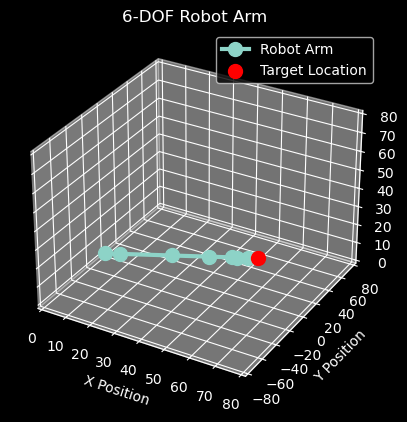

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Panjang segmen lengan (cm)
L1 = 7   # Base
L2 = 24  # Lower arm
L3 = 17  # Center arm
L4 = 11  # Upper arm
L5 = 2   # Neck gripper
L6 = 5   # Gripper

def forward_kinematics(angles):
    θ1, θ2, θ3, θ4, θ5, θ6 = angles
    x, y, z = 0, 0, 0
    positions = [(x, y, z)]

    # Joint 1 (base)
    x += L1 * np.cos(θ1)
    y += L1 * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 2 (lower arm)
    x += L2 * np.cos(θ1 + θ2)
    y += L2 * np.sin(θ1 + θ2)
    positions.append((x, y, z))

    # Joint 3 (center arm)
    x += L3 * np.cos(θ1 + θ2 + θ3)
    y += L3 * np.sin(θ1 + θ2 + θ3)
    positions.append((x, y, z))

    # Joint 4 (upper arm)
    x += L4 * np.cos(θ1 + θ2 + θ3 + θ4)
    y += L4 * np.sin(θ1 + θ2 + θ3 + θ4)
    positions.append((x, y, z))

    # Joint 5 (neck gripper)
    x += L5 * np.cos(θ1 + θ2 + θ3 + θ4 + θ5)
    y += L5 * np.sin(θ1 + θ2 + θ3 + θ4 + θ5)
    positions.append((x, y, z))

    # Joint 6 (gripper/end-effector)
    x += L6 * np.cos(θ1 + θ2 + θ3 + θ4 + θ5 + θ6)
    y += L6 * np.sin(θ1 + θ2 + θ3 + θ4 + θ5 + θ6)
    positions.append((x, y, z))

    return positions

def objective_function(angles, x_target, y_target, z_target):
    end_effector_position = forward_kinematics(angles)[-1]
    x, y, z = end_effector_position
    distance = np.sqrt((x - x_target)**2 + (y - y_target)**2 + (z - z_target)**2)
    return distance

def inverse_kinematics_6dof(x_target, y_target, z_target):
    initial_guess = [0, 0, 0, 0, 0, 0]
    bounds = [
        (0, 2 * np.pi),  # Base
        (0, np.pi),      # Lower arm
        (0, np.pi),      # Center arm
        (0, np.pi),      # Upper arm
        (0, 2 * np.pi),  # Neck
        (0, np.pi)       # Gripper
    ]
    result = minimize(objective_function, initial_guess, args=(x_target, y_target, z_target), bounds=bounds)

    if result.success:
        return result.x
    else:
        raise ValueError("Tidak ditemukan solusi")

def plot_arm(angles, x_target, y_target, z_target):
    positions = forward_kinematics(angles)
    x_coords, y_coords, z_coords = zip(*positions)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_coords, y_coords, z_coords, '-o', markersize=10, lw=3, label="Robot Arm")
    ax.scatter(x_target, y_target, z_target, color='red', s=100, label="Target Location")
    ax.set_xlim([0, 80])
    ax.set_ylim([-80, 80])
    ax.set_zlim([0, 80])
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    plt.title("6-DOF Robot Arm")
    plt.legend()
    plt.show()

# Target posisi dalam 3D
x_target, y_target, z_target = 50, 50, 0

try:
    theta1, theta2, theta3, theta4, theta5, theta6 = inverse_kinematics_6dof(x_target, y_target, z_target)
    print(f"Calculated Angles: Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°, Theta3 = {np.degrees(theta3):.2f}°, Theta4 = {np.degrees(theta4):.2f}°, Theta5 = {np.degrees(theta5):.2f}°, Theta6 = {np.degrees(theta6):.2f}°")

    plot_arm([theta1, theta2, theta3, theta4, theta5, theta6], x_target, y_target, z_target)
except ValueError as e:
    print(e)


### 6 DoF in 3D

Calculated Angles: Theta1 = 63.43°, Theta2 = 0.00°, Theta3 = 0.00°, Theta4 = 0.00°, Theta5 = 0.00°, Theta6 = 0.00°


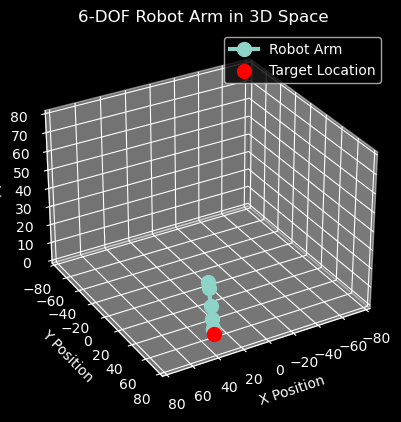

In [6]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Panjang segmen lengan (cm)
L1 = 7   # Base
L2 = 24  # Lower arm
L3 = 17  # Center arm
L4 = 11  # Upper arm
L5 = 2   # Neck gripper
L6 = 5   # Gripper

def forward_kinematics(angles):
    θ1, θ2, θ3, θ4, θ5, θ6 = angles
    x, y, z = 0, 0, 0
    positions = [(x, y, z)]

    # Joint 1 (base rotation)
    x += L1 * np.cos(θ1)
    y += L1 * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 2 (lower arm vertical movement)
    z += L2 * np.sin(θ2)
    x += L2 * np.cos(θ2) * np.cos(θ1)
    y += L2 * np.cos(θ2) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 3 (center arm vertical movement)
    z += L3 * np.sin(θ2 + θ3)
    x += L3 * np.cos(θ2 + θ3) * np.cos(θ1)
    y += L3 * np.cos(θ2 + θ3) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 4 (upper arm vertical movement)
    z += L4 * np.sin(θ2 + θ3 + θ4)
    x += L4 * np.cos(θ2 + θ3 + θ4) * np.cos(θ1)
    y += L4 * np.cos(θ2 + θ3 + θ4) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 5 (neck gripper)
    z += L5 * np.sin(θ2 + θ3 + θ4 + θ5)
    x += L5 * np.cos(θ2 + θ3 + θ4 + θ5) * np.cos(θ1)
    y += L5 * np.cos(θ2 + θ3 + θ4 + θ5) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 6 (gripper/end-effector)
    z += L6 * np.sin(θ2 + θ3 + θ4 + θ5 + θ6)
    x += L6 * np.cos(θ2 + θ3 + θ4 + θ5 + θ6) * np.cos(θ1)
    y += L6 * np.cos(θ2 + θ3 + θ4 + θ5 + θ6) * np.sin(θ1)
    positions.append((x, y, z))

    return positions

def objective_function(angles, x_target, y_target, z_target):
    end_effector_position = forward_kinematics(angles)[-1]
    x, y, z = end_effector_position
    distance = np.sqrt((x - x_target)**2 + (y - y_target)**2 + (z - z_target)**2)
    return distance

def inverse_kinematics_6dof(x_target, y_target, z_target):
    initial_guess = [0, 0, 0, 0, 0, 0]
    bounds = [
        (0, 2 * np.pi),  # Base
        (0, np.pi),      # Lower arm
        (0, np.pi),      # Center arm
        (0, np.pi),      # Upper arm
        (0, 2 * np.pi),  # Neck
        (0, np.pi)       # Gripper
    ]
    result = minimize(objective_function, initial_guess, args=(x_target, y_target, z_target), bounds=bounds)

    if result.success:
        return result.x
    else:
        raise ValueError("Tidak ditemukan solusi")

def plot_arm(angles, x_target, y_target, z_target):
    positions = forward_kinematics(angles)
    x_coords, y_coords, z_coords = zip(*positions)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_coords, y_coords, z_coords, '-o', markersize=10, lw=3, label="Robot Arm")
    ax.scatter(x_target, y_target, z_target, color='red', s=100, label="Target Location")
    ax.set_xlim([-80, 80])
    ax.set_ylim([-80, 80])
    ax.set_zlim([0, 80])
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    plt.title("6-DOF Robot Arm in 3D Space")
    ax.view_init(elev=30, azim=60)  # Sudut pandang
    plt.legend()
    plt.show()

# Target posisi dalam 3D
x_target, y_target, z_target = 30, 60, 0

try:
    theta1, theta2, theta3, theta4, theta5, theta6 = inverse_kinematics_6dof(x_target, y_target, z_target)
    print(f"Calculated Angles: Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°, Theta3 = {np.degrees(theta3):.2f}°, Theta4 = {np.degrees(theta4):.2f}°, Theta5 = {np.degrees(theta5):.2f}°, Theta6 = {np.degrees(theta6):.2f}°")

    plot_arm([theta1, theta2, theta3, theta4, theta5, theta6], x_target, y_target, z_target)
except ValueError as e:
    print(e)


### 6 DoF Interactive

Calculated Angles: Theta1 = 53.13°, Theta2 = 30.77°, Theta3 = 0.27°, Theta4 = 0.65°, Theta5 = 225.56°, Theta6 = 0.01°


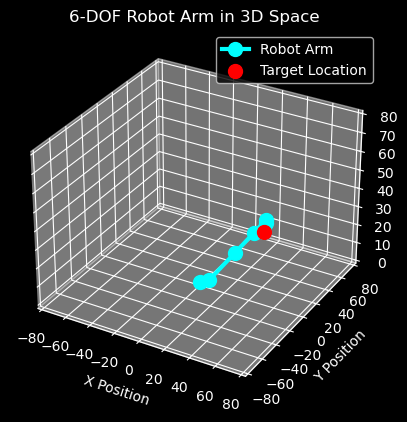

In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Panjang segmen lengan (cm)
L1 = 7   # Base
L2 = 24  # Lower arm
L3 = 17  # Center arm
L4 = 11  # Upper arm
L5 = 2   # Neck gripper
L6 = 5   # Gripper

def forward_kinematics(angles):
    θ1, θ2, θ3, θ4, θ5, θ6 = angles
    x, y, z = 0, 0, 0
    positions = [(x, y, z)]

    # Joint 1 (base rotation)
    x += L1 * np.cos(θ1)
    y += L1 * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 2 (lower arm vertical movement)
    z += L2 * np.sin(θ2)
    x += L2 * np.cos(θ2) * np.cos(θ1)
    y += L2 * np.cos(θ2) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 3 (center arm vertical movement)
    z += L3 * np.sin(θ2 + θ3)
    x += L3 * np.cos(θ2 + θ3) * np.cos(θ1)
    y += L3 * np.cos(θ2 + θ3) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 4 (upper arm vertical movement)
    z += L4 * np.sin(θ2 + θ3 + θ4)
    x += L4 * np.cos(θ2 + θ3 + θ4) * np.cos(θ1)
    y += L4 * np.cos(θ2 + θ3 + θ4) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 5 (neck gripper)
    z += L5 * np.sin(θ2 + θ3 + θ4 + θ5)
    x += L5 * np.cos(θ2 + θ3 + θ4 + θ5) * np.cos(θ1)
    y += L5 * np.cos(θ2 + θ3 + θ4 + θ5) * np.sin(θ1)
    positions.append((x, y, z))

    # Joint 6 (gripper/end-effector)
    z += L6 * np.sin(θ2 + θ3 + θ4 + θ5 + θ6)
    x += L6 * np.cos(θ2 + θ3 + θ4 + θ5 + θ6) * np.cos(θ1)
    y += L6 * np.cos(θ2 + θ3 + θ4 + θ5 + θ6) * np.sin(θ1)
    positions.append((x, y, z))

    return positions

def objective_function(angles, x_target, y_target, z_target):
    end_effector_position = forward_kinematics(angles)[-1]
    x, y, z = end_effector_position
    distance = np.sqrt((x - x_target)**2 + (y - y_target)**2 + (z - z_target)**2)
    return distance

def inverse_kinematics_6dof(x_target, y_target, z_target):
    initial_guess = [0, 0, 0, 0, 0, 0]
    bounds = [
        (0, 2 * np.pi),  # Base
        (0, np.pi),      # Lower arm
        (0, np.pi),      # Center arm
        (0, np.pi),      # Upper arm
        (0, 2 * np.pi),  # Neck
        (0, np.pi)       # Gripper
    ]
    result = minimize(objective_function, initial_guess, args=(x_target, y_target, z_target), bounds=bounds)

    if result.success:
        return result.x
    else:
        raise ValueError("Tidak ditemukan solusi")

def plot_arm_interactive(angles, x_target, y_target, z_target):
    positions = forward_kinematics(angles)
    x_coords, y_coords, z_coords = zip(*positions)

    # Mode interaktif matplotlib
    plt.ion()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_coords, y_coords, z_coords, '-o', markersize=10, lw=3, label="Robot Arm", color="cyan")
    ax.scatter(x_target, y_target, z_target, color='red', s=100, label="Target Location")
    ax.set_xlim([-80, 80])
    ax.set_ylim([-80, 80])
    ax.set_zlim([0, 80])
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    plt.title("6-DOF Robot Arm in 3D Space")
    ax.legend()

    # Buat window interaktif
    plt.show(block=True)  # Tahan window sampai Anda menutupnya

# Target posisi dalam 3D
x_target, y_target, z_target = 30, 40, 20

try:
    theta1, theta2, theta3, theta4, theta5, theta6 = inverse_kinematics_6dof(x_target, y_target, z_target)
    print(f"Calculated Angles: Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°, Theta3 = {np.degrees(theta3):.2f}°, Theta4 = {np.degrees(theta4):.2f}°, Theta5 = {np.degrees(theta5):.2f}°, Theta6 = {np.degrees(theta6):.2f}°")

    plot_arm_interactive([theta1, theta2, theta3, theta4, theta5, theta6], x_target, y_target, z_target)
except ValueError as e:
    print(e)


### 2 Dof

Calculated Angles: Theta1 = 8.19°, Theta2 = 94.57°


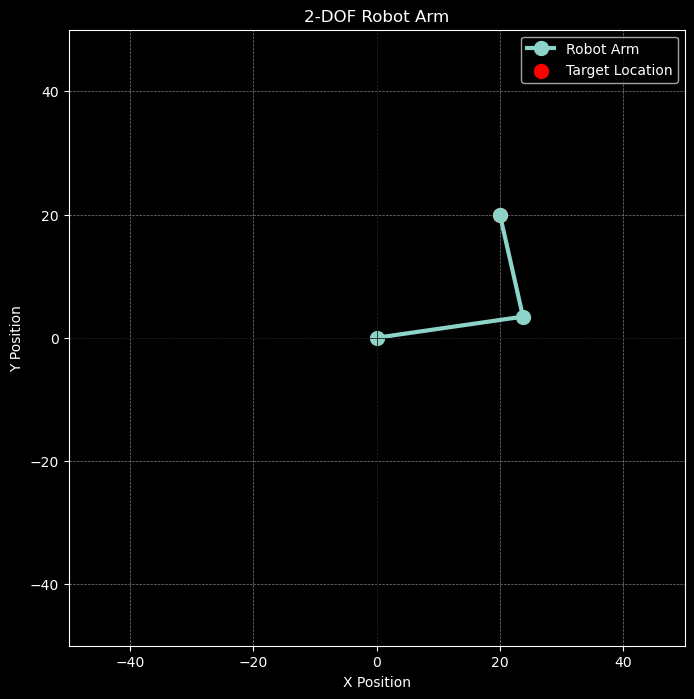

In [8]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Panjang segmen
L1 = 24  # lower arm
L2 = 17  # center arm

def forward_kinematics(angles):
    """
    Hitung posisi end-effector berdasarkan sudut dua joint.
    `angles` adalah list yang berisi dua sudut [θ1, θ2].
    """
    θ1, θ2 = angles
    
    # Mulai dari posisi dasar
    x = 0
    y = 0
    positions = [(x, y)]

    # Joint 1 (base)
    x += L1 * np.cos(θ1)
    y += L1 * np.sin(θ1)
    positions.append((x, y))

    # Joint 2 (end-effector)
    x += L2 * np.cos(θ1 + θ2)
    y += L2 * np.sin(θ1 + θ2)
    positions.append((x, y))

    return positions

def objective_function(angles, x_target, y_target):
    """
    Fungsi objektif untuk optimasi inverse kinematics.
    """
    end_effector_position = forward_kinematics(angles)[-1]  # Hanya posisi end-effector
    x, y = end_effector_position
    distance = np.sqrt((x - x_target)**2 + (y - y_target)**2)  # Jarak Euclidean
    return distance

def inverse_kinematics_2dof(x_target, y_target):
    """
    Menghitung inverse kinematics untuk mencapai target di (x, y) dalam 2D.
    """
    initial_guess = [0, 0]  # Sudut awal
    result = minimize(objective_function, initial_guess, args=(x_target, y_target), bounds=[(-np.pi, np.pi)]*2)

    if result.success:
        return result.x
    else:
        raise ValueError("Tidak ditemukan solusi")

def plot_arm(angles, x_target, y_target):
    """
    Visualisasi lengan robot dalam 2D berdasarkan sudut sendi dan lokasi objek target.
    """
    positions = forward_kinematics(angles)
    x_coords, y_coords = zip(*positions)

    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, '-o', markersize=10, lw=3, label="Robot Arm")
    plt.scatter(x_target, y_target, color='red', s=100, label="Target Location")
    
    plt.xlim([-50, 50])
    plt.ylim([-50, 50])
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("2-DOF Robot Arm")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.show()

# Target posisi dalam 2D
x_target, y_target = 20, 20

try:
    theta1, theta2 = inverse_kinematics_2dof(x_target, y_target)
    print(f"Calculated Angles: Theta1 = {np.degrees(theta1):.2f}°, Theta2 = {np.degrees(theta2):.2f}°")

    plot_arm([theta1, theta2], x_target, y_target)
except ValueError as e:
    print(e)
